# <a name="0">Тестовое задание</a>

Описание тестового задания:
Реализовать простую модель машинного обучения, ĸоторая предсĸазывает знаĸ изменения
свободной энергии связывания (ddG) на основе данных из базы SKEMPI 2.0. Необходимо
продемонстрировать, что модель обучается (ĸачеством модели можно пренебречь в рамĸах
тестового задания). Если не удаётся обучить модель или добиться ожидаемой обучаемости,
просьба всё равно предоставить весь разработанный ĸод и описать проделанные шаги. Это
позволит нам оценить ваш подход ĸ решению задачи и уровень владения инструментами
для работы с данными и моделями машинного обучения.

Требования ĸ выполненной работе:
1. Код должен быть загружен в виде репозитория на GitHub с публичным доступом.
2. Должны быть даны ĸомментарии ĸ ĸоду и описан ход ваших размышлений.

## 1. <a name="1">Считывание набора данных</a>
(<a href="#0">Перейти в начало</a>)

Считаем набор данных в структуру dataframe, используя Pandas.

In [12]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('C://Users/nasty/Desktop/skempi/skempi_v2.csv', delimiter=';', on_bad_lines='skip', quoting=3)
print('Размер обучающей выборки:', data.shape)
data.head()

Размер обучающей выборки: (7085, 29)


,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_mut_parsed,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,5.260000e-11,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,8.330000e-12,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,1.020000e-07,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,1.720000e-10,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,1.920000e-09,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1


Посмотрим какие есть столбцы:

In [13]:
print(data.columns)
data.info()
data.describe()

Index(['#Pdb', 'Mutation(s)_PDB', 'Mutation(s)_cleaned',
       'iMutation_Location(s)', 'Hold_out_type', 'Hold_out_proteins',
       'Affinity_mut (M)', 'Affinity_mut_parsed', 'Affinity_wt (M)',
       'Affinity_wt_parsed', 'Reference', 'Protein 1', 'Protein 2',
       'Temperature', 'kon_mut (M^(-1)s^(-1))', 'kon_mut_parsed',
       'kon_wt (M^(-1)s^(-1))', 'kon_wt_parsed', 'koff_mut (s^(-1))',
       'koff_mut_parsed', 'koff_wt (s^(-1))', 'koff_wt_parsed',
       'dH_mut (kcal mol^(-1))', 'dH_wt (kcal mol^(-1))',
       'dS_mut (cal mol^(-1) K^(-1))', 'dS_wt (cal mol^(-1) K^(-1))', 'Notes',
       'Method', 'SKEMPI version'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7085 entries, 0 to 7084
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   #Pdb                          7085 non-null   object 
 1   Mutation(s)_PDB               7085 non-null   object

,Affinity_mut_parsed,Affinity_wt_parsed,kon_mut (M^(-1)s^(-1)),kon_mut_parsed,kon_wt (M^(-1)s^(-1)),kon_wt_parsed,koff_mut_parsed,koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),SKEMPI version
count,6.800000e+03,7.083000e+03,1.844000e+03,1.844000e+03,1.853000e+03,1.853000e+03,1.844000e+03,1.860000e+03,443.000000,443.000000,443.000000,443.000000,7085.000000
mean,3.296118e-05,2.293822e-06,2.526311e+07,2.526311e+07,3.118592e+07,3.118592e+07,7.653679e-01,2.655187e-01,-11.223025,-13.614582,-5.831533,-9.208275,1.573888
std,6.258186e-04,1.991603e-05,1.409556e+08,1.409556e+08,9.531700e+07,9.531700e+07,5.904961e+00,1.734081e+00,12.898223,11.581970,41.951826,36.425865,0.494545
min,2.000000e-16,3.300000e-16,5.000000e+01,5.000000e+01,5.400000e+02,5.400000e+02,5.800000e-08,5.000000e-08,-66.860000,-50.680000,-189.090909,-128.051948,1.000000
25%,5.400000e-10,1.110000e-10,6.327500e+04,6.327500e+04,6.700000e+04,6.700000e+04,1.670000e-04,1.150000e-04,-14.400000,-19.300000,-16.180900,-24.800000,1.000000
50%,1.700000e-08,3.000000e-09,3.275000e+05,3.275000e+05,3.980000e+05,3.980000e+05,1.575000e-03,3.000000e-04,-8.900000,-11.200000,0.010000,-1.010000,2.000000
75%,1.200000e-06,8.000000e-08,3.212500e+06,3.212500e+06,3.700000e+06,3.700000e+06,2.802500e-02,1.100000e-02,-4.300000,-7.400000,15.268456,15.100671,2.000000
max,4.050000e-02,6.350000e-04,4.500000e+09,4.500000e+09,7.000000e+08,7.000000e+08,1.200000e+02,1.490000e+01,15.600000,5.900000,96.239318,48.000000,2.000000


Как видим, нет колонки ddG прямо в датасете, но можно самим создать и посчитать ddG:

ΔΔG = RT * ln(Kd_mut / Kd_wt)

где:

Kd_mut = Affinity_mut_parsed

Kd_wt = Affinity_wt_parsed

R = 1.987 × 10⁻³ kcal/(mol·K) (газовая постоянная)

T = Температура (если нет — примем 298 K)

In [26]:
R = 1.987e-3  # kcal/(mol·K)

# Если где-то нет температуры — заменим на стандартные 298 K
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce').fillna(298)

# Убираем строки с пустыми значениями
data = data.dropna(subset=['Affinity_mut_parsed', 'Affinity_wt_parsed'])

# Убираем строки, где аффинности ≤ 0 
data = data[(data['Affinity_mut_parsed'] > 0) & (data['Affinity_wt_parsed'] > 0)]

# Считаем ΔΔG
data['ddG'] = R * data['Temperature'] * np.log(data['Affinity_mut_parsed'] / data['Affinity_wt_parsed'])

# Смотрим на новые значения
print(data[['Affinity_mut_parsed', 'Affinity_wt_parsed', 'ddG']].head())

   Affinity_mut_parsed  Affinity_wt_parsed       ddG
0         5.260000e-11        1.120000e-12  2.248727
1         8.330000e-12        1.120000e-12  1.172173
2         1.020000e-07        1.120000e-12  6.670962
3         1.720000e-10        1.120000e-12  2.940849
4         1.920000e-09        1.120000e-12  4.350229


sign_ddG
1    5160
0    1638
Name: count, dtype: int64


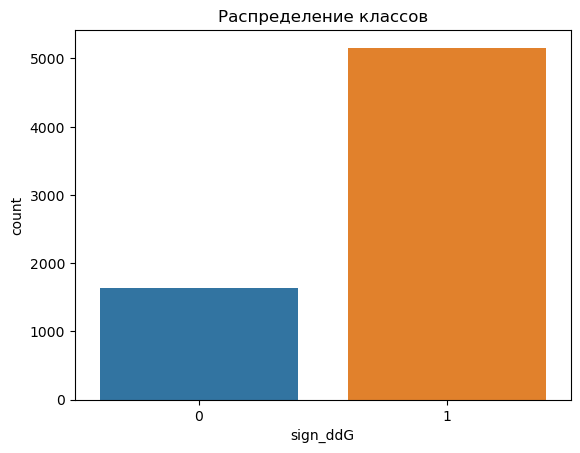

In [32]:
#Создаем целевую переменную — знак ΔΔG
data['sign_ddG'] = data['ddG'].apply(lambda x: 1 if x > 0 else 0)

import matplotlib.pyplot as plt
import seaborn as sns

# Проверяем баланс классов
print(data['sign_ddG'].value_counts())
sns.countplot(x='sign_ddG', data=data)
plt.title('Распределение классов')
plt.show()

In [ ]:
# Сохраняем результат
data.to_csv('C://Users/nasty/Desktop/skempi/file_with_ddG.csv', index=False)

In [28]:
#Посмотрим полученный файл
data2 = pd.read_csv('C://Users/nasty/Desktop/skempi/file_with_ddG.csv', delimiter=',', on_bad_lines='skip', quoting=3)
print('Размер обучающей выборки:', data2.shape)
data2.head()

Размер обучающей выборки: (1288, 31)


,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version,ddG,sign_ddG
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,5.260000e-11,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,2.248727,1
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,8.330000e-12,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,1.172173,1
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,1.020000e-07,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,6.670962,1
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,1.720000e-10,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,2.940849,1
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,1.920000e-09,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,4.350229,1


Выбирем признаки, которые:

- логически могут влиять на ΔΔG (физически, биологически);

- не зависят напрямую от целевой переменной (чтобы не было "подглядывания" за ответом);

- не содержат слишком много пропусков;

- могут быть переведены в числовую или категориальную форму.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# Выберем несколько признаков:
features = ['Mutation(s)_cleaned', 'iMutation_Location(s)', 'Method']

X = data[features]
y = data['sign_ddG']


In [37]:
#Делим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 2. <a name="2">Разработка модели машинного обучения</a>
(<a href="#0">Перейти в начало</a>)

   * <a href="#21">Исследовательский анализ данных</a>
   * <a href="#23">Обработка данных</a>
   * <a href="#24">Обучение модели</a>

### 2.1 <a name="21">Исследовательский анализ данных</a>
(<a href="#2">Перейти к разработке модели машинного обучения</a>)

Получим количество строк, столбцов и некоторую простую статистику набора данных.

In [ ]:
# Получим типы данных и количество ненулевых значений для каждого столбца
print("Информация о тренировочных данных:")
X_train.info()

print("\nИнформация о тестовых данных:")
X_test.info()

Информация о тренировочных данных:
<class 'pandas.core.frame.DataFrame'>
Index: 5438 entries, 2072 to 1033
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mutation(s)_cleaned    5438 non-null   object
 1   iMutation_Location(s)  5438 non-null   object
 2   Method                 5438 non-null   object
dtypes: object(3)
memory usage: 169.9+ KB

Информация о тестовых данных:
<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 5754 to 2817
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mutation(s)_cleaned    1360 non-null   object
 1   iMutation_Location(s)  1360 non-null   object
 2   Method                 1360 non-null   object
dtypes: object(3)
memory usage: 42.5+ KB


In [41]:
print("\nРаспределение классов в y_train:")
print(y_train.value_counts())

print("\nРаспределение классов в y_test:")
print(y_test.value_counts())


Распределение классов в y_train:
sign_ddG
1    4128
0    1310
Name: count, dtype: int64

Распределение классов в y_test:
sign_ddG
1    1032
0     328
Name: count, dtype: int64


In [45]:
# Выведем базовую статистику для столбцов
X_train.describe()

,Mutation(s)_cleaned,iMutation_Location(s),Method
count,5438,5438,5438
unique,4463,400,20
top,HA167A,COR,SPR
freq,19,1731,2020


In [44]:
X_test.describe()

,Mutation(s)_cleaned,iMutation_Location(s),Method
count,1360,1360,1360
unique,1271,172,19
top,AA167H,COR,SPR
freq,6,424,495


In [46]:
print(X_train.columns)

Index(['Mutation(s)_cleaned', 'iMutation_Location(s)', 'Method'], dtype='object')


In [47]:
print(X_test.columns)

Index(['Mutation(s)_cleaned', 'iMutation_Location(s)', 'Method'], dtype='object')


### 2.2 <a name="23">Обработка данных</a>
(<a href="#2">Перейти к разработке модели машинного обучения</a>)


In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


### PIPELINE ###
################

# Конвейер необходимых преобразований данных, вместе с обучением в конце

# Строим пайплайн обработки для категориальных фич
categorical_features = features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Заполняем пропуски
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Кодируем One-Hot
])

# Объединяем всё в один препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Строим общий пайплайн: препроцессинг + модель
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Отобразим конвейер
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mutation(s)_cleaned',
                                                   'iMutation_Location(s)',
                                                   'Method'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### 2.3 <a name="24">Обучение модели</a>
(<a href="#2">Перейти к разработке модели машинного обучения</a>)


In [57]:
# Обучение классификатора на обучающей выборке
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mutation(s)_cleaned',
                                                   'iMutation_Location(s)',
                                                   'Method'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
#Проверка классификатора

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Используем обученную модель для прогнозирования на обучающем наборе данных

training_predictions = model.predict(X_train)

print('Характеристики модели на обучающей выборке:')
print(confusion_matrix(y_train, training_predictions))
print(classification_report(y_train, training_predictions))
print("Метрика accuracy:", accuracy_score(y_train, training_predictions))

Характеристики модели на обучающей выборке:
[[1244   66]
 [  14 4114]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1310
           1       0.98      1.00      0.99      4128

    accuracy                           0.99      5438
   macro avg       0.99      0.97      0.98      5438
weighted avg       0.99      0.99      0.99      5438

Метрика accuracy: 0.9852887090842222


## 3. <a name="3">Прогнозирование на тестовом наборе данных</a>
(<a href="#0">Перейти в начало</a>)

Используем тестовую выборку для прогнозирования с помощью обученной модели.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Используем обученную модель для прогнозирования на тестовом наборе данных

test_predictions = model.predict(X_test)

print('Характеристики модели на тестовой выборке:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Метрика accuracy:", accuracy_score(y_test, test_predictions))

Характеристики модели на тестовой выборке:
[[  64  264]
 [  19 1013]]
              precision    recall  f1-score   support

           0       0.77      0.20      0.31       328
           1       0.79      0.98      0.88      1032

    accuracy                           0.79      1360
   macro avg       0.78      0.59      0.59      1360
weighted avg       0.79      0.79      0.74      1360

Метрика accuracy: 0.7919117647058823
